# Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import time
import matplotlib.pyplot as plt
from datetime import datetime
import gc
import functions

In [2]:
import functions_

def updatelib():
    import importlib
    importlib.reload(functions_)

In [4]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk('./data'):
    f.extend(filenames)
    break
    
dir_path = './data/'
dfs = [dir_path + f[i] for i in range(len(f))]

In [5]:
nov = dfs[-2]

In [6]:
nov.split('-')[1][:3]

'Nov'

## [RQ1]
A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing
funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?

# 1.a
What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

### 1.b
How many times, on average, a user views a product before adding it to the cart?

### 1.c
What’s the probability that products added once to the cart are effectively bought?

### 1.d
What’s the average time an item stays in the cart before being removed?

# 1.e
How much time passes on average between the first view time and a purchase/addition to cart?

In [ ]:
functions.view_purch_avg_time(sample)

In [ ]:
functions_.view_purch_avg_time(nov)

## [RQ2]
What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.

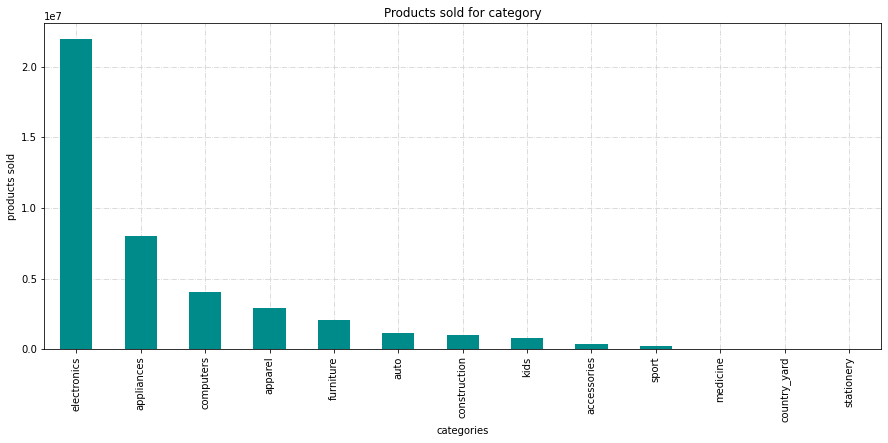

category
electronics     21988192
appliances       8037980
computers        4029049
apparel          2942622
furniture        2058798
auto             1164278
construction     1047072
kids              779517
accessories       380373
sport             240763
medicine           20764
country_yard       17299
stationery         11943
Name: product_id, dtype: int64

In [104]:
functions_.products_for_category(nov)

### 2.a
Plot the most visited subcategories.

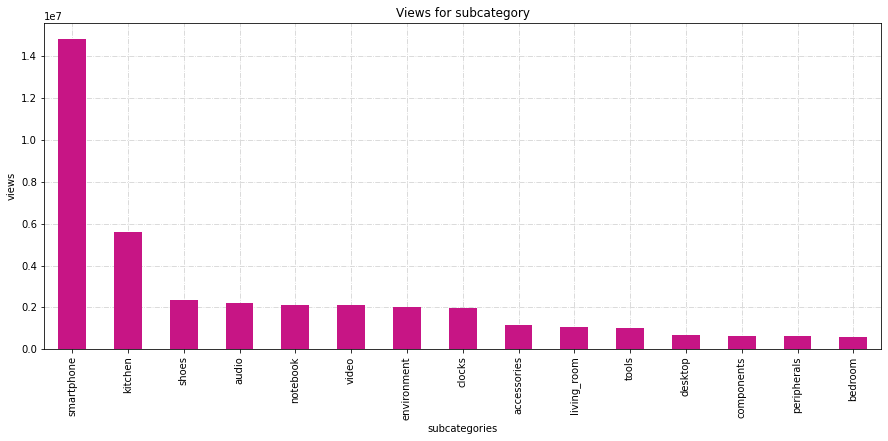

sub_category_1
smartphone        14832387
kitchen            5580742
shoes              2353170
audio              2193152
notebook           2103024
video              2093728
environment        2009404
clocks             1994440
accessories        1164278
living_room        1043222
tools              1021917
desktop             673875
components          637935
peripherals         614373
bedroom             575931
tablet              464073
carriage            336311
telephone           327630
bag                 306574
iron                278574
sewing_machine      266114
costume             241589
personal            216216
toys                199612
bicycle             106037
dress                95954
trainer              93430
dolls                86219
camera               82782
skates               70649
wallet               68909
ironing_board        60187
swing                57430
jeans                52145
bathroom             50532
shirt                50460
underwear    

In [105]:
functions_.most_viewed_subcategories_month(nov)

### 2.b
What are the 10 most sold products per category?

#### Observations
For each category of the ecommerce dataframe, we computed the 10 most sold products. We can see this big schema here:

In [207]:
functions_.best_in_cat(nov)

,category,product_id,event_type
0,accessories,18300021,53
1,accessories,28401112,48
2,accessories,18300155,42
3,accessories,18300460,38
4,accessories,28400759,36
...,...,...,...
125,stationery,12901426,6
126,stationery,12900360,5
127,stationery,12900361,5
128,stationery,12901271,5


Anyway, if we are interested in one particular category, we can obviously look at the 10 most sold products within this category. For example, if we want to see the overall best products in the category `electronics`, we can just call the same function with the parameter `cat`.

In [208]:
functions_.best_in_cat(nov, cat='electronics')

,category,product_id,event_type
70,electronics,1004856,32321
71,electronics,1004767,22613
72,electronics,1005115,22244
73,electronics,4804056,17800
74,electronics,1004833,13486
75,electronics,1002544,11678
76,electronics,1004870,10673
77,electronics,1005100,10132
78,electronics,1004249,8881
79,electronics,1005105,8483


## [RQ3]
For each category, what’s the brand whose prices are higher on average?

### 3.a
Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

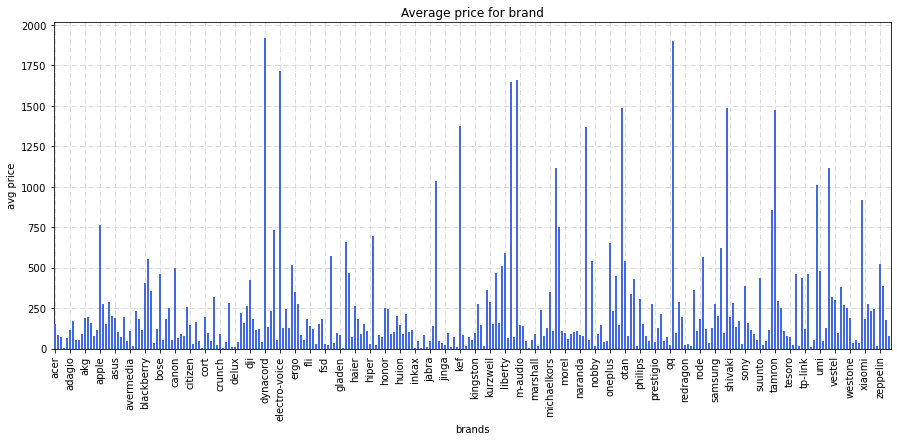

In [289]:
# e.g., if `category = electronics`
functions_.avg_price_cat(nov, 'electronics')

### 3.b
Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

In [64]:
updatelib()

functions_.highest_price_brands(nov)

,,price_avg
category,brand,
medicine,omron,53.110095
stationery,xerox,66.670000
country_yard,viking,722.756054
accessories,weekend,773.611582
apparel,sergiorossi,1018.397273
auto,metabo,1123.877582
kids,hartan,1801.820000
furniture,senspa,1976.539630
electronics,rado,2041.073729


## [RQ5]
In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of
the week show the hourly average of visitors your store has.

In [ ]:
def avg_users(path):
    df = pd.read_csv(path, usecols=['event_time', 'user_id'], iterator=True, chunksize=100000)
    
    

In [ ]:
def avg_users(df):
    """Plot for each day of the week the hourly average of visitors the store has

    Args:
        df (pd.DataFrame): Dataframe to use for the calculations
    """

    week_days = []

    for _, week_day_df in df.groupby([df.event_time.dt.weekday], sort=False):
        users_num = week_day_df.groupby([week_day_df.event_time.dt.hour], sort=False).count()['user_id']
        week_days.append((users_num, week_day_df.event_time.iloc[0].strftime('%A')))

    plots_colors = ['royalblue', 'orange', 'mediumseagreen',
                    'crimson', 'darkcyan', 'coral', 'violet']

    # For every day of the week, plot the average number of users that visit the store each hour
    for i, (week_day, day_name) in enumerate(week_days):
        # Plot them
        plot_bar(to_plot=week_day,
                 title='Average number of users per hour - {}'.format(
                     day_name),
                 xlabel='Hour',
                 ylabel='Avg users',
                 color=plots_colors[i]
                 )
    gc.collect
    return

In [ ]:
# Use sample for time reasons

functions.avg_users(sample)

## [RQ6]
The conversion rate of a product is given by the purchase rate over the number of times the product has been visited. What's the conversion rate of your online store?

### 6.a
Find the overall conversion rate of your store.

In [ ]:
functions.overall_conversion_rate(sample)

### 6.b
Plot the purchase rate of each category and show the conversion rate of each category in decreasing order.

In [ ]:
functions.category_conv_rate(sample)

## [RQ7]
The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your
customers.

Prove that the pareto principle applies to your store.

In [ ]:
print('20% of the users in the ecommerce provide for {:.2f} of the entire business.'.format(functions.pareto_principle(df_Nov)))

In [ ]:
print('25% of the users in the ecommerce provide for {:.2f} of the entire business.'.format(functions.pareto_principle(df_Nov, 25)))

#### Observations

As we can see in the previous cells, the Pareto principle is respected (with a 75/25 ratio).

Moreover, we can also analyze the behaviour with respect to the percentage of users considered. If we look at the plot below, we can see that 10% of the users already provide for more than half of the whole business. Also, from the 50% point on, we can see that the whole business is almost completely conducted by the first half of the users.

In [ ]:
functions.plot_pareto(df_Nov)